In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = "../data/beer.csv"

df = pd.read_csv(DATASET_PATH)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [4]:
df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


## Consistency checking
Here, I would like to check some fundamental qualities of the dataset such as missing values, outliers, uniqueness or relationship.
The goal is to know what's in the dataset, so that we don't make unjustified assumptions.

### `id`, `name`

In [5]:
len(df)

1586614

In [6]:
df["brewery_id"].isna().sum()

0

In [7]:
df["brewery_name"].isna().sum()

15

<AxesSubplot:>

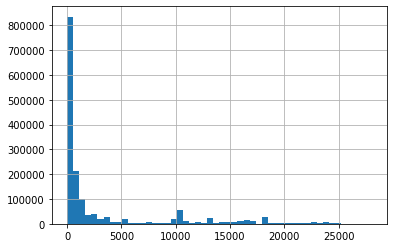

In [8]:
df["brewery_id"].hist(bins=50)

In [9]:
df[["brewery_name", "brewery_id"]].groupby(by="brewery_id") \
    .nunique() \
    .sort_values(by="brewery_name", ascending=False) \
    .rename(columns={"brewery_name": "n_unique_names"})

,n_unique_names
brewery_id,
1,1
14609,1
14598,1
14589,1
14577,1
...,...
4123,1
4121,1
28003,1


In [10]:
df[["brewery_name", "brewery_id"]].groupby(by="brewery_name") \
    .nunique() \
    .sort_values(by="brewery_id", ascending=False) \
    .rename(columns={"brewery_id": "n_unique_ids"})

,n_unique_ids
brewery_name,
Ram Restaurant & Brewery,8
Hops Grillhouse & Brewery,7
BJ's Restaurant & Brewery,4
Sierra Madre Brewing Co.,4
Hereford & Hops Restaurant & Brewpub,4
...,...
Den Engel Bierbrouwers,1
Dempsey's Restaurant And Brewery,1
"Dempsey's Brewery, Restaurant & Pub",1


In [11]:
# df.query("brewery_id == 27")  # looks valid, just unknown brewery name

In [12]:
# df.query("brewery_id == 1193") # looks valid, just unknown brewery name

In [13]:
# example (the other way around)
df.query("brewery_name == 'Ram Restaurant & Brewery'").get("brewery_id").value_counts()

3964     50
1455     50
5191     45
4069     42
5439     22
4978      4
16413     3
21590     1
Name: brewery_id, dtype: int64

**Remark:** The relationship between `id` and `name` doesn't look good. Generally, it appears as a one-to-one relationship (that's what I would expect), but it turns out there are several breweries represented by different ids.

A single `id` always has a single name associated with it (except for two "unnamed" cases), but we cannot rely on having a constant `id` for a single name. Something to remember about.

### `review_time`
Let's check if the timestamp is consistent.

In [14]:
df["review_time"].isna().sum()

0

In [15]:
review_time = pd.to_datetime(df["review_time"], unit="s")

In [16]:
review_time.describe(datetime_is_numeric=True)

count                          1586614
mean     2008-10-15 16:48:00.012210944
min                1996-08-22 00:00:01
25%      2007-03-06 23:36:28.249999872
50%         2009-04-08 15:01:21.500000
75%      2010-10-31 23:40:05.249999872
max                2012-01-11 12:35:48
Name: review_time, dtype: object

Looks OK.

### `review` figures

In [17]:
review_figures = ["review_overall", "review_aroma", "review_appearance", "review_palate", "review_taste"]

df[review_figures].describe().apply(round, args=(2,))

,review_overall,review_aroma,review_appearance,review_palate,review_taste
count,1586614.00,1586614.00,1586614.00,1586614.00,1586614.00
mean,3.82,3.74,3.84,3.74,3.79
std,0.72,0.70,0.62,0.68,0.73
min,0.00,1.00,0.00,1.00,1.00
25%,3.50,3.50,3.50,3.50,3.50
50%,4.00,4.00,4.00,4.00,4.00
75%,4.50,4.00,4.00,4.00,4.50
max,5.00,5.00,5.00,5.00,5.00


In [18]:
df[review_figures].isna().sum(axis=0)

review_overall       0
review_aroma         0
review_appearance    0
review_palate        0
review_taste         0
dtype: int64

In [19]:
df[[c for c in review_figures if not c.endswith("overall")]].mean(axis=1) - df["review_overall"]

0          0.375
1         -0.125
2         -0.125
3          0.000
4          0.250
           ...  
1586609   -1.125
1586610   -0.625
1586611   -1.000
1586612    0.500
1586613   -0.500
Length: 1586614, dtype: float64

Again, this look healthy in terms of the data formats, outliers and missing values.

The line above, I wanted to check if the `review_overall` columns wasn't redundant as the value could have been a simple average over other figures. It appears to be a weighted average though, so no. It's not redundant.

### `review_profilename`

In [20]:
df["review_profilename"].isna().sum()

348

In [21]:
df["review_profilename"].nunique()

33387

In [22]:
df["review_profilename"].str.strip().str.lower().nunique()

33387

In [23]:
df["review_profilename"].value_counts().sort_values(ascending=False)

northyorksammy     5817
BuckeyeNation      4661
mikesgroove        4617
Thorpe429          3518
womencantsail      3497
                   ... 
jams7611              1
JOENAMATH1            1
ilikebeerandski       1
zeravat               1
Anchaya               1
Name: review_profilename, Length: 33387, dtype: int64

**Remark:** It looks good. The data is fairly consistent. There is a small fraction of missing values (~1%) of all the unique profiles. The way they are provided is also OK (simple check on dangling spaces and case sensitiveness).

### `beer`: `name` and `id`
Similar check to what we had before. Is it consident?

In [24]:
df["beer_name"].isna().sum()

0

In [25]:
df["beer_name"].nunique()

56857

In [26]:
df["beer_name"].str.strip().str.lower().nunique()

56803

In [27]:
df["beer_name"].value_counts()

90 Minute IPA                                         3290
India Pale Ale                                        3130
Old Rasputin Russian Imperial Stout                   3111
Sierra Nevada Celebration Ale                         3000
Two Hearted Ale                                       2728
                                                      ... 
Coffee With Cream Stout                                  1
Karuizawa Kogen Beer: Seasonal 2010, Irish Red Ale       1
The Knowledge                                            1
Härtsfelder Kloster Braunbier                            1
Brett The Hitman Hart                                    1
Name: beer_name, Length: 56857, dtype: int64

In [28]:
pd.DataFrame(df[df["beer_name"] != df["beer_name"].str.strip()]["beer_name"]).drop_duplicates()

,beer_name
180932,Alesmith Speedway Stout - Vanilla And Coconut
334479,Colônia Pilsen
334487,Colônia Extra Lager


OK, so we'll need to normalize this field, as it appears that some beer have their names written in different ways. The above ones are the prime examples.

In [29]:
df["beer_beerid"].nunique()

66055

In [30]:
df["beer_beerid"].isna().sum()

0

In [31]:
df[["beer_name", "beer_beerid"]].groupby(by="beer_beerid") \
    .nunique() \
    .sort_values(by="beer_name", ascending=False) \
    .rename(columns={"beer_name": "n_unique_names"}) \
    .get("n_unique_names") \
    .sum()

66055

In [32]:
df[["beer_name", "beer_beerid"]].groupby(by="beer_name") \
    .nunique() \
    .sort_values(by="beer_beerid", ascending=False) \
    .rename(columns={"beer_beerid": "n_unique_ids"}) \
    .get("n_unique_ids") \
    .sum()

66055

OK, so the only issue it seems are the little inconsistencies in typing. We'll fix that.

### `beer_abv`

In [33]:
round(df["beer_abv"].isna().sum() / len(df["beer_abv"]) * 100, 2)

4.27

~4% of missing values: "not great, not terrible."

In [34]:
df["beer_abv"].describe().apply(round, args=(2,))

count    1518829.00
mean           7.04
std            2.32
min            0.01
25%            5.20
50%            6.50
75%            8.50
max           57.70
Name: beer_abv, dtype: float64

OK... if a beer's ABV is 57% is not a beer anymore... :P Let's check the distribution.

<AxesSubplot:>

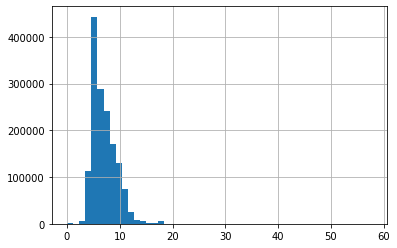

In [35]:
df["beer_abv"].hist(bins=50)

**Remark:** Looks like beer. We should probably chop the dataset at `beer_abv` > 20, cause it's unrealisic for human beeings to drink that.

### "Cross-relationship"

array([[<AxesSubplot:title={'center':'beers_per_brewery'}>]], dtype=object)

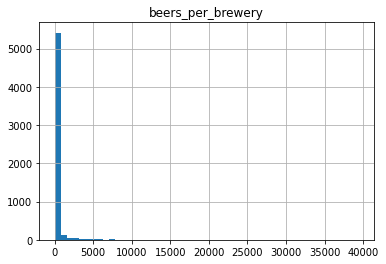

In [36]:
df[["brewery_name", "beer_name"]] \
    .groupby("brewery_name") \
    .count() \
    .sort_values(by="beer_name", ascending=False) \
    .rename(columns={"beer_name": "beers_per_brewery"}) \
    .hist(bins=50)

**Remark:** This is kind of expected. We have a few breweries that supply a large variety of beers and a long tail of single (or niche) assortiment. We may need to get rid of those when considering a recommender system if it turns out that reviews obtained from those (aka few samples) skew our results.

## Conclusions

Alright, the dataset looks quite OK. We can proceed with analysing the numbers and answering questions.
There is, however, a short TODO list when it comes to curing this data:
1. We can remove the unnamed breweries. There are only two of these.
2. Convert the timestamps to something human-readable upon picking up the dataset again.
3. Cast all reviews to int8 for memory saving and speed (I know it's a small datset, I am just saying I think of it should it grow larger one day...).
4. Convert all textual data to lowercase for ease-of-use (and also for consistency for the `beer_name` column).
5. Throw away all entries of beers with ABV greater than 20% (for human safety reasons).

Once we have that, we can look into correlations, which may allow us to throw away more columns (even though I don't really think it will).